In [ ]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
def draw_fun(original, modified, t_name):
  plt.subplot(121)
  plt.imshow(original, 'gray')
  plt.title('original')
  plt.subplot(122)
  plt.imshow(modified, 'gray')
  plt.title(t_name)
  plt.show()


Используя выбранные вами изображения (не менее 3-х), продемонстрировать результаты применения эрозии, дилатации, открытия, закрытия, морфологического градиента, преобразования tophat и balckhat.

In [ ]:
!curl https://i.imgur.com/cKNlEF1.png > /content/rectangle.png
!curl https://i.imgur.com/qJ0ui8M.png > /content/rectangle_noise_around.png
!curl https://i.imgur.com/wkei93D.png > /content/rectangle_noise_inside.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1160  100  1160    0     0   5269      0 --:--:-- --:--:-- --:--:--  5272
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1596  100  1596    0     0  13067      0 --:--:-- --:--:-- --:--:-- 13081
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1459  100  1459    0     0  10392      0 --:--:-- --:--:-- --:--:-- 10421


In [ ]:
rectangle = cv2.imread('/content/rectangle.png', cv2.IMREAD_GRAYSCALE)
rectangle_noise_around = cv2.imread('/content/rectangle_noise_around.png', cv2.IMREAD_GRAYSCALE)
rectangle_noise_inside = cv2.imread('/content/rectangle_noise_inside.png', cv2.IMREAD_GRAYSCALE)

In [ ]:
def morphology(image):
  kernel = np.ones((5, 5), np.uint8)
  erosion = cv2.erode(image, kernel, iterations=1)
  draw_fun(image, erosion, 'Erosion')

  dilate = cv2.dilate(image, kernel, iterations=2)
  draw_fun(image, dilate, 'dilation')

  kernel = np.ones((5, 5), np.uint8)
  opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
  draw_fun(image, opening, 'opening')

  kernel = np.ones((3, 3), np.uint8)
  closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
  draw_fun(image, closing, 'closing')

  kernel = np.ones((3, 3), np.uint8)
  gradient = cv2.morphologyEx(image, cv2.MORPH_GRADIENT, kernel)
  draw_fun(image, gradient, 'gradient')

  kernel = np.ones((5, 5), np.uint8)
  tophat = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, kernel)
  draw_fun(image, tophat, 'tophat')

  kernel = np.ones((51, 51), np.uint8)
  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (21, 21))
  blackhat = cv2.morphologyEx(dilate, cv2.MORPH_BLACKHAT, kernel)
  draw_fun(dilate, blackhat, 'blackhat')



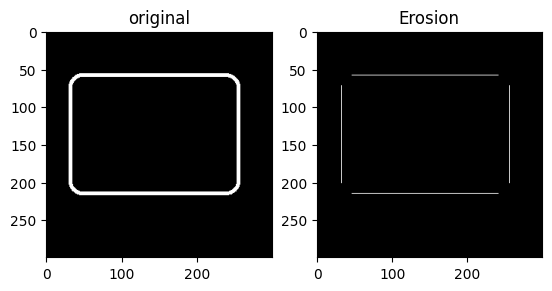

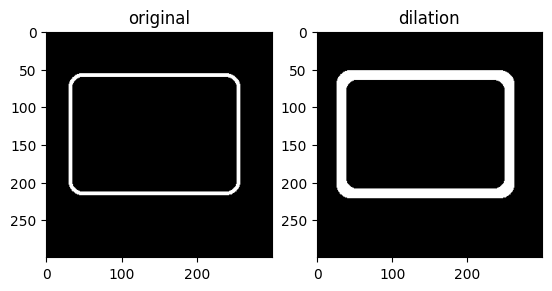

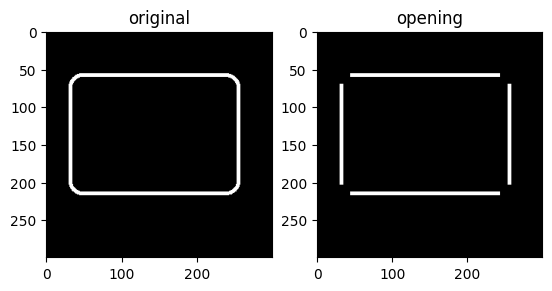

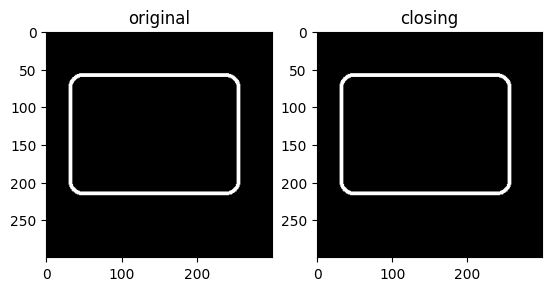

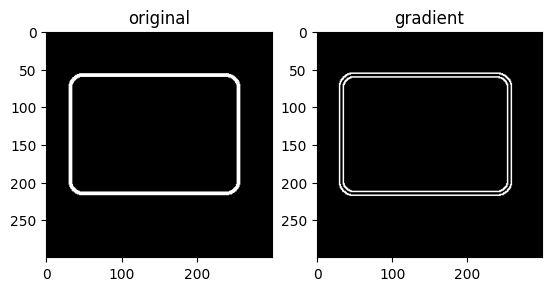

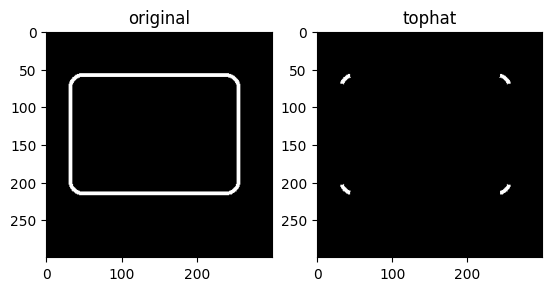

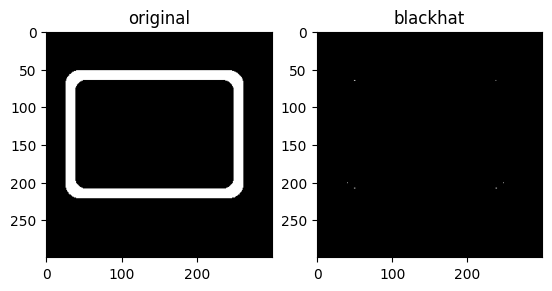

In [ ]:
morphology(rectangle)

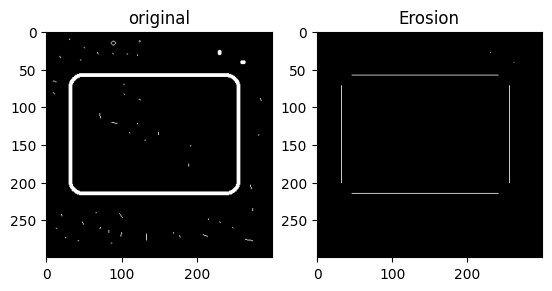

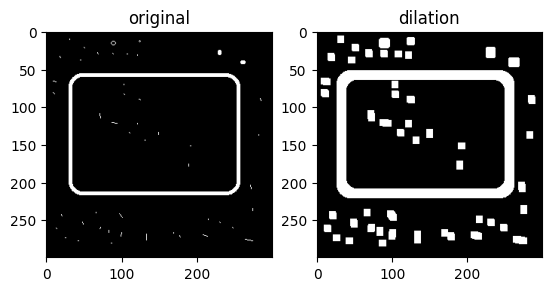

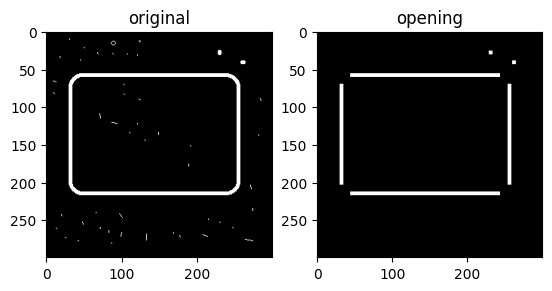

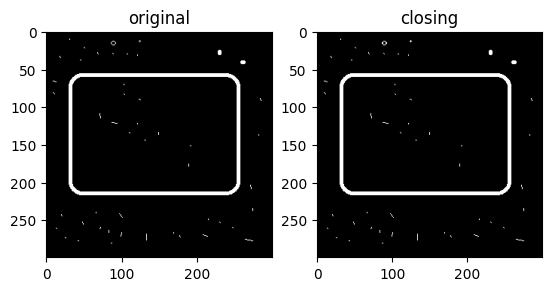

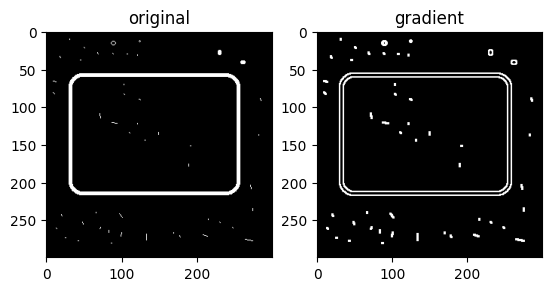

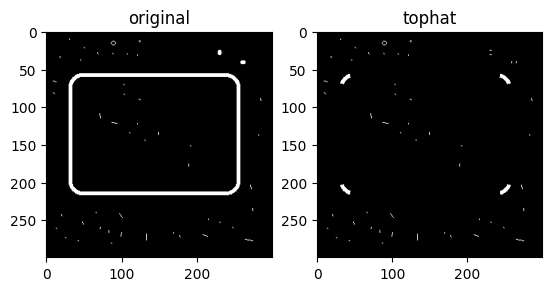

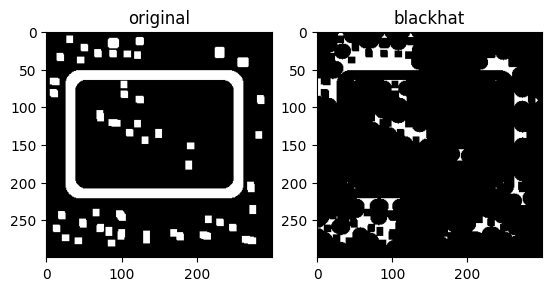

In [ ]:
morphology(rectangle_noise_around)

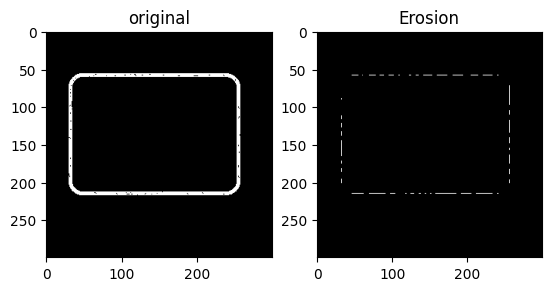

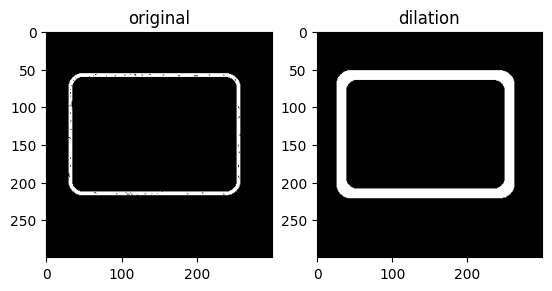

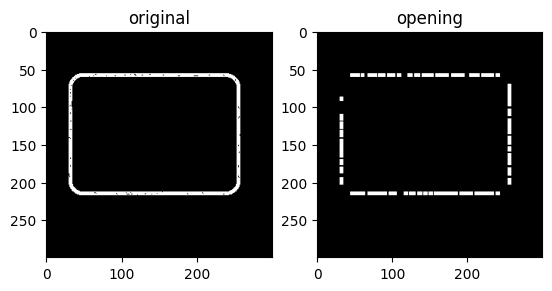

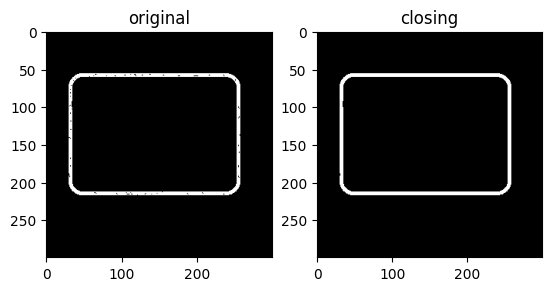

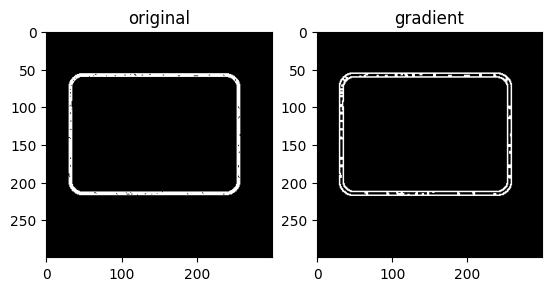

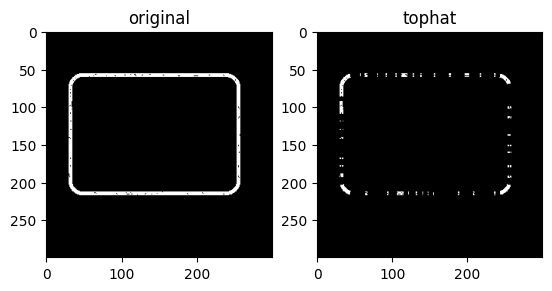

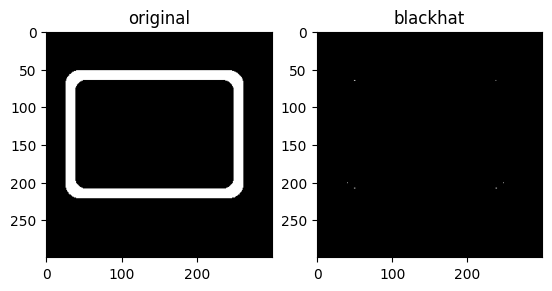

In [ ]:
morphology(rectangle_noise_inside)


In [ ]:
!curl https://docs.opencv.org/4.x/blackhat.png > /content/blackhat.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   557  100   557    0     0   3058      0 --:--:-- --:--:-- --:--:--  3077


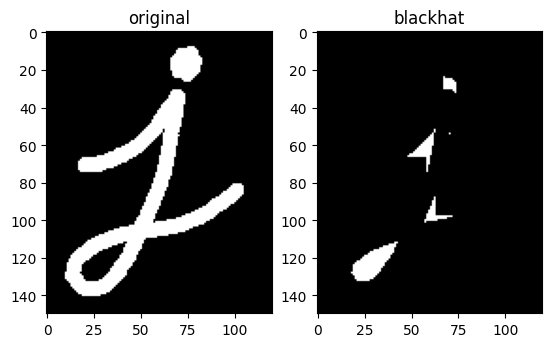

In [ ]:
blackhat = cv2.imread("/content/blackhat.png", cv2.IMREAD_GRAYSCALE)
blackhat = blackhat[:, 0:120]
kernel = np.ones((11, 11), np.uint8)
result = cv2.morphologyEx(blackhat, cv2.MORPH_BLACKHAT, kernel)
draw_fun(blackhat, result, 'blackhat')